In [105]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.stats import mode

In [64]:
X, y = load_digits(return_X_y=True)
print(X.data.shape)
print(y.shape)

(1797, 64)
(1797,)


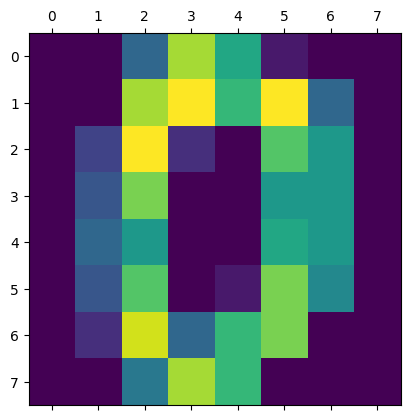

In [65]:
plt.matshow(X[0].reshape((8,8)));

In [84]:
n_digits = np.unique(y).size
m,n = X.shape

print(f'Digits:{n_digits}, Features:{n}, Samples:{m}.')

Digits:10, Features:64, Samples:1797.


In [85]:
scale = StandardScaler()
scale.fit(X)
X_scaled = scale.transform(X)

In [118]:
kmeans = KMeans(init='k-means++', n_clusters=n_digits, n_init=4, random_state=0)
kmeans = kmeans.fit(X_scaled)

In [121]:
prediction = kmeans.predict(X_scaled)

i0 = np.where(y == 0)
mode(prediction[i0],keepdims=True)[0][0]

1

In [87]:
kmeans.cluster_centers_.shape

(10, 64)

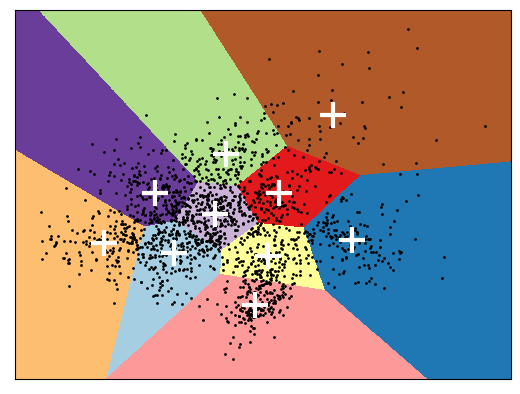

In [145]:
#Plotting the decision boundary using the example described in https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html#sphx-glr-auto-examples-cluster-plot-kmeans-digits-py

reduced_data = PCA(n_components=2).fit_transform(X_scaled)
kmeans = KMeans(init='k-means++', n_clusters=n_digits, n_init=4)
kmeans.fit(reduced_data)

h = 0.01

x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower",
)

plt.plot(reduced_data[:, 0], reduced_data[:, 1], "k.", markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="+",
    s=369,
    linewidths=3,
    color="w",
    zorder=10,
)

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()